In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv('gender_submission.csv')
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [ ]:
data.index

RangeIndex(start=0, stop=418, step=1)

In [ ]:
data.shape

(418, 2)

In [ ]:
data.size

836

In [ ]:
data.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [ ]:
data.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
# Cleaning Data
missing_data = data.isnull().sum()
missing_data

,0
PassengerId,0
Survived,0


In [ ]:
data = data.drop_duplicates()
data.head(8)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0


In [ ]:
# Correct the column name to 'PassengerId'
data['PassengerId'] = pd.to_numeric(data['PassengerId'], errors='coerce')
data['Survived'] = pd.to_numeric(data['Survived'], errors='coerce')

In [ ]:
summary_stats = data.describe()
print(summary_stats)

       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


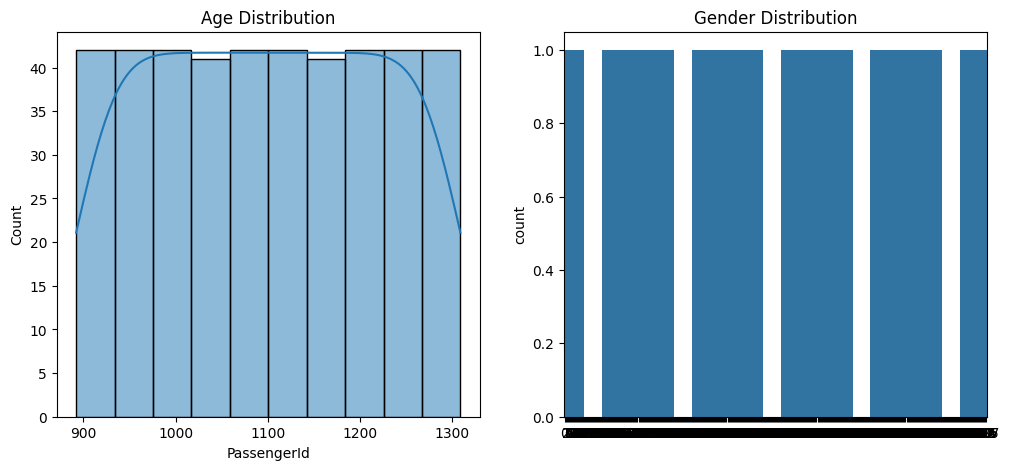

In [ ]:
# Univariate Analysis:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['PassengerId'].dropna(), kde=True)
plt.title('Age Distribution')
plt.subplot(1, 2, 2)
sns.countplot(data['Survived'])
plt.title('Gender Distribution')
plt.show()

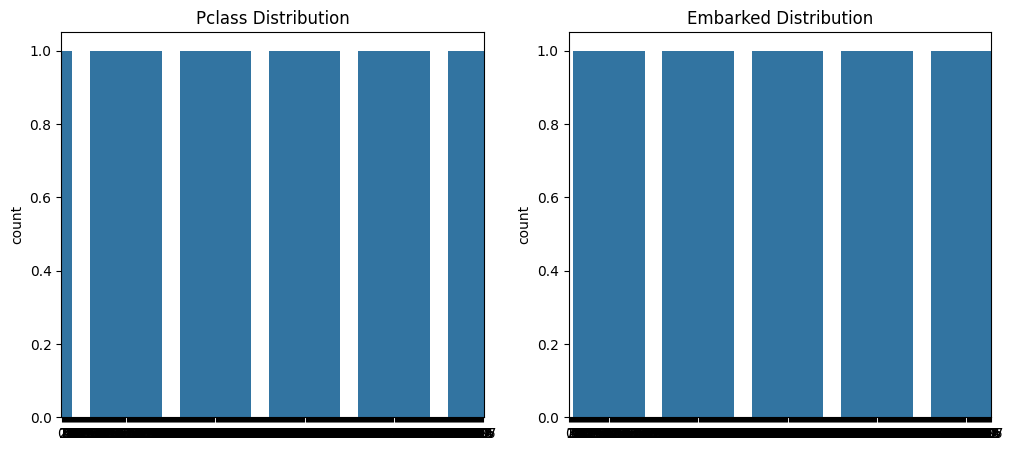

In [ ]:
# Categorical Variables:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data['PassengerId'])
plt.title('Pclass Distribution')
plt.subplot(1, 2, 2)
sns.countplot(data['Survived'])
plt.title('Embarked Distribution')
plt.show()

<Axes: xlabel='PassengerId'>

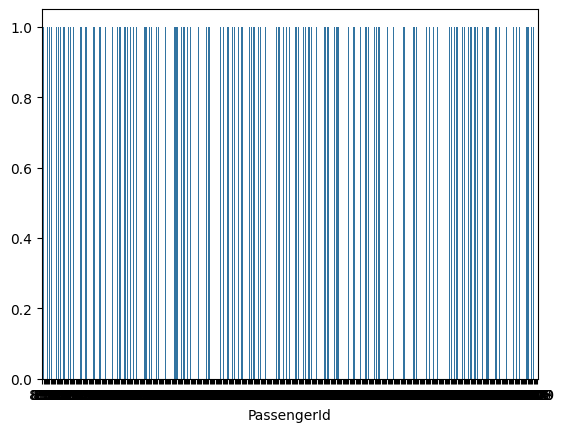

In [ ]:
# Calculate Survival Rate by PassengerId (assuming this was the intention)
Survival_rate_by_class = data.groupby('PassengerId')['Survived'].mean()

# Now you can use it in the barplot
sns.barplot(x=PassengerId_by_class.index, y=Survival_rate_by_class.values)

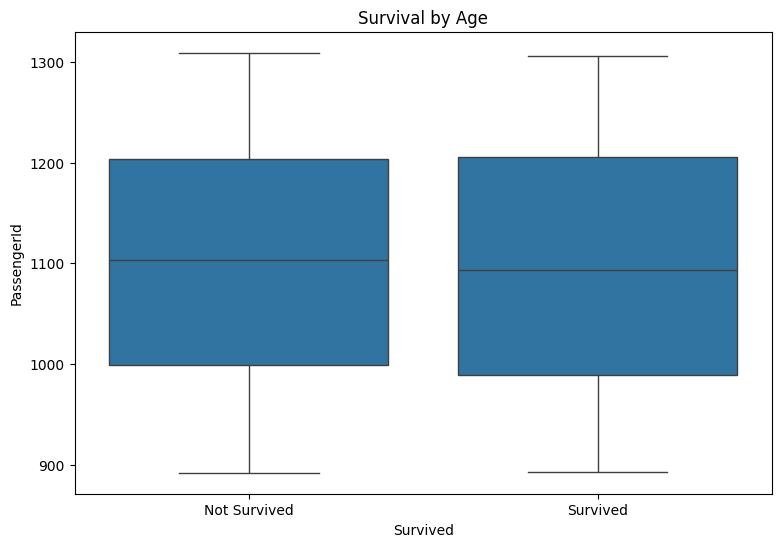

In [ ]:
# Visualizing Survival by Age:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Survived', y='PassengerId', data=data)
plt.title('Survival by Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

In [ ]:
data['FamilySize'] = data['PassengerId'] + data['Survived']

In [ ]:
# Verify if 'SibSp' exists, and check for potential typos
print(data.columns)  # Print all column names

# If 'SibSp' is misspelled, correct it
# For example, if it's 'Sibsp', change your code to:
# data['FamilySize'] = data['Sibsp'] + data['Parch']

# If 'SibSp' is truly missing, you'll need to either:
# 1. Load the correct data containing this column.
# 2. Engineer a proxy for 'SibSp' if possible based on other available data.
# 3. Proceed without calculating 'FamilySize' if it's not essential.

Index(['PassengerId', 'Survived'], dtype='object')


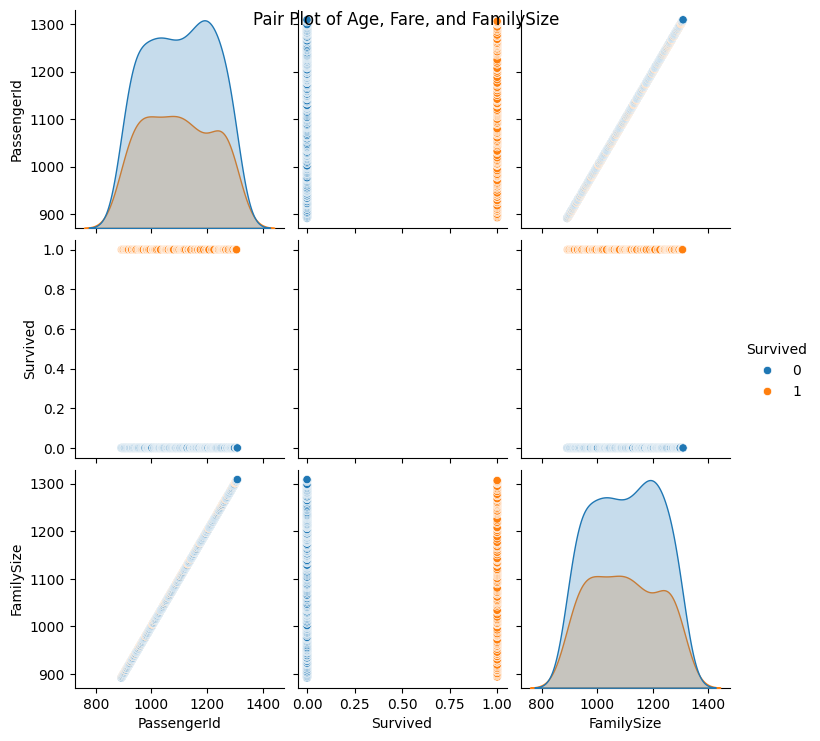

In [ ]:
sns.pairplot(data, vars=['PassengerId', 'Survived', 'FamilySize'], hue='Survived')
plt.suptitle('Pair Plot of Age, Fare, and FamilySize')
plt.show()

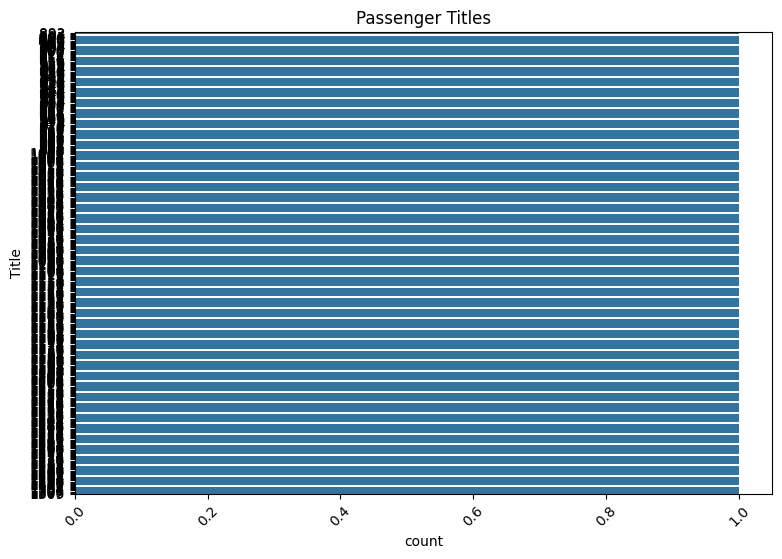

In [ ]:
if 'PassengerId' in data.columns:
    # If 'Name' column exists, proceed with title extraction
    data['Title'] = data['PassengerId'].astype(str)

    # Visualizing Passenger Titles
    plt.figure(figsize=(9, 6))
    sns.countplot(data['Title'])
    plt.title('Passenger Titles')
    plt.xticks(rotation=45)
    plt.show()

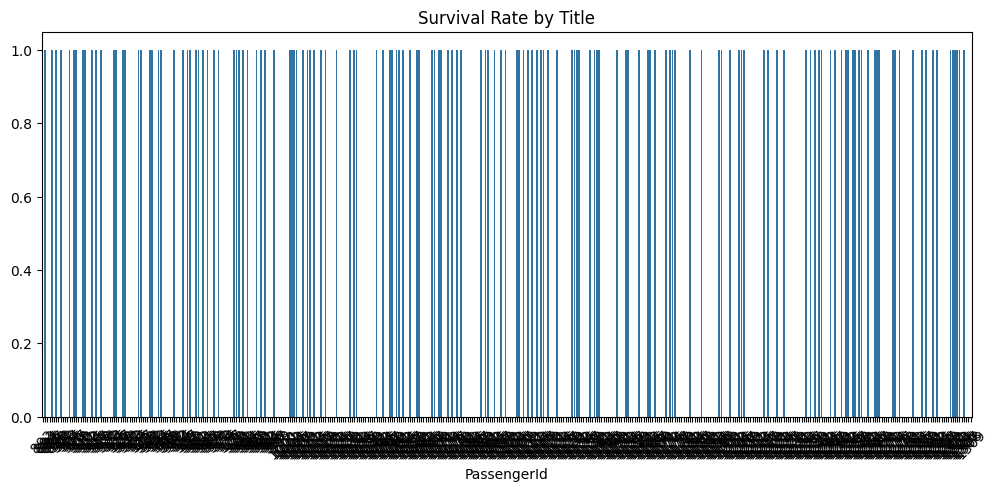

In [ ]:
# Survival by Title:
title_survival_rate = data.groupby('Title')['Survived'].mean()
plt.figure(figsize=(12, 5))
sns.barplot(x=PassengerId_by_class.index, y=Survival_rate_by_class.values)
plt.title('Survival Rate by Title')
plt.xticks(rotation=45)
plt.show()